In [6]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

from sqlalchemy import create_engine

In [2]:
# Establish database connection:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query:
engine.dispose()

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Break into a set of features and a variable for the known outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace some random string values.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# Normalize
X_std = StandardScaler().fit_transform(X)

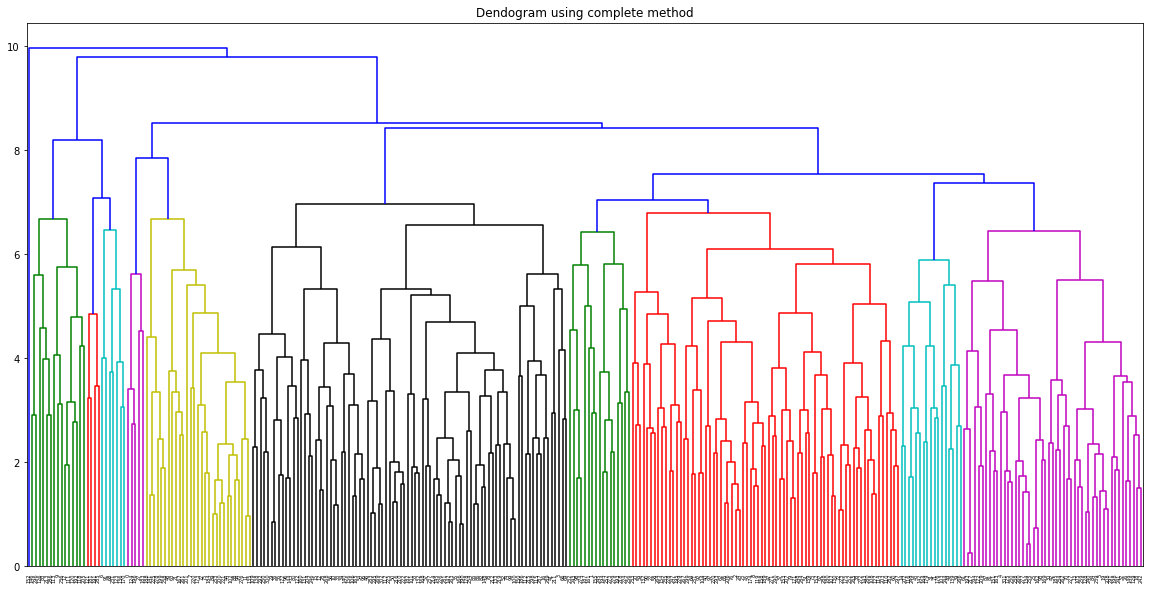

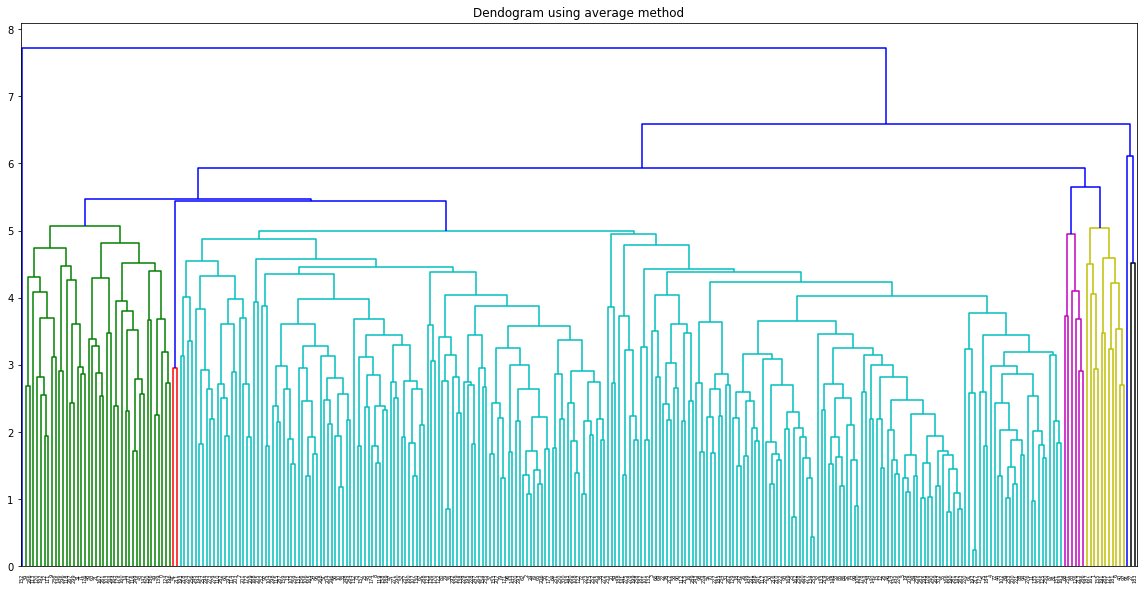

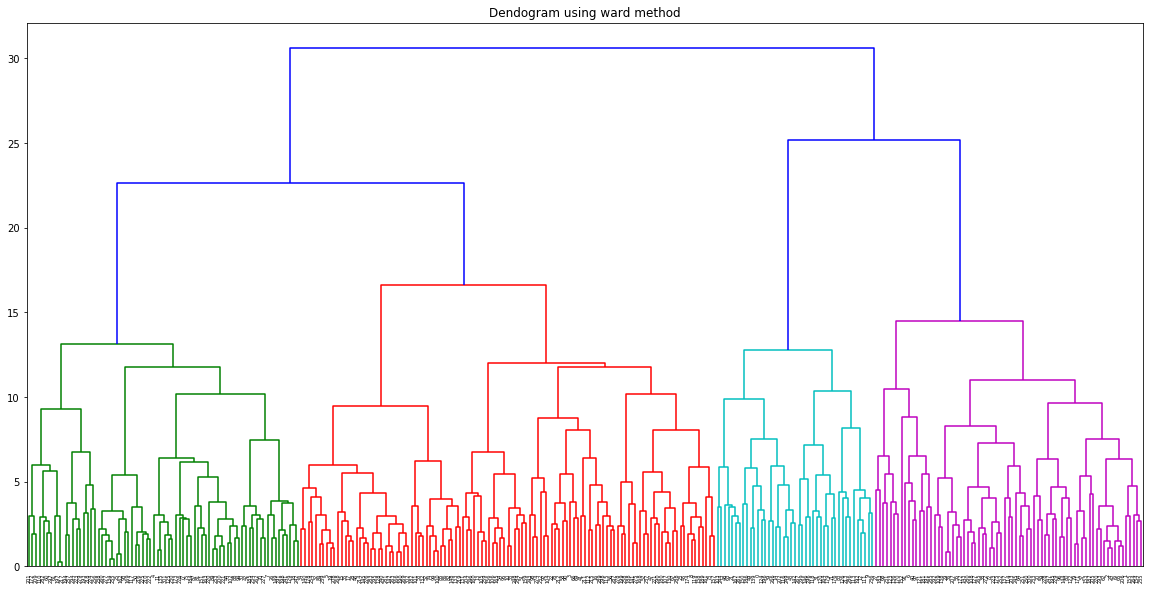

In [7]:
# Draw dendograms from different agglomerative linkage methods:
methods = ['complete', 'average', 'ward']

for method in methods:
    plt.figure(figsize=(20,10))
    dendrogram(linkage(X_std, method=method))
    plt.title('Dendogram using {} method'.format(method))
    plt.show()


Looking at the 3 dendograms above, we can see that ward method gave us the most intuitive clusters. The complete and average methods produced results that are hard to reconcile with the facts as their two cluster solutions has too few observations for one of the clusters. 

In [21]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score of linkage method average: 0.2940490133353465
Silhouette score of linkage method average: 0.14837359969689895
------------------------------------------------
ARI score of linkage method complete: 0.21394030618551016
Silhouette score of linkage method complete: 0.11730765444448985
------------------------------------------------
ARI score of linkage method ward: 0.146129913123814
Silhouette score of linkage method ward: 0.13871973665572218


According to the results, the best scores are achieved by the linkage methode average. The ARI and silhouette scores of the two cluster k-means solution was 0.44 and 0.17 respectively. So, in terms of ARI the best model seems to be k-means, however in terms of silhouette score the best one is agglomerative clustering.